# Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


# Configuration

In [4]:
path_lst = [
    '/content/drive/MyDrive/experiments/MNIST/SVM/',
    '/content/drive/MyDrive/experiments/IMDB/SVM/'
]

# Load JSON Files

In [3]:
import json
def read_json(path):
  with open(path, 'r', encoding='utf-8') as file:
    data = json.load(file)
  return data

In [5]:
exp_id = '102'

In [8]:
import os

all_files = []
for folder in path_lst:
  files_inside_folder = os.listdir(folder)
  desired_files = [folder+item for item in files_inside_folder if item.startswith('102')]
  all_files.extend(desired_files)

print(all_files)

['/content/drive/MyDrive/experiments/MNIST/SVM/102-no-mnist(0-1)-0.json', '/content/drive/MyDrive/experiments/MNIST/SVM/102-backdoor-mnist(0-1)-20.json', '/content/drive/MyDrive/experiments/MNIST/SVM/102-backdoor-mnist(0-1)-40.json', '/content/drive/MyDrive/experiments/MNIST/SVM/102-backdoor-mnist(0-1)-60.json', '/content/drive/MyDrive/experiments/MNIST/SVM/102-backdoor-mnist(0-1)-80.json', '/content/drive/MyDrive/experiments/MNIST/SVM/102-backdoor-mnist(0-1)-100.json', '/content/drive/MyDrive/experiments/MNIST/SVM/102-backdoor-mnist(0-1)-0.json', '/content/drive/MyDrive/experiments/MNIST/SVM/102-influence-mnist(0-1)-40.json', '/content/drive/MyDrive/experiments/MNIST/SVM/102-influence-mnist(0-1)-20.json', '/content/drive/MyDrive/experiments/MNIST/SVM/102-influence-mnist(0-1)-60.json', '/content/drive/MyDrive/experiments/MNIST/SVM/102-influence-mnist(0-1)-80.json', '/content/drive/MyDrive/experiments/MNIST/SVM/102-influence-mnist(0-1)-100.json', '/content/drive/MyDrive/experiments/MNIS

In [9]:
contents = [read_json(file_path) for file_path in all_files]

In [13]:
def extract_info(json_dict):
  attack = json_dict['log']['attack']
  train_acc = json_dict['log']['accuracy_Train']
  test_acc = json_dict['log']['accuracy_Test']
  ba = json_dict['log']['benign_accuracy'] if 'benign_accuracy' in json_dict['log'] else 0.0
  asr = json_dict['log']['attack_success_rate'] if 'attack_success_rate' in json_dict['log'] else 0.0
  poisoning_rate = json_dict['poisoning_rate']
  dataset = json_dict['log']['dataset']
  model = json_dict['log']['model']
  return {
      'attack':attack,
      'train_acc':train_acc,
      'test_acc':test_acc,
      'ba':ba,
      'asr':asr,
      'poisoning_rate':poisoning_rate,
      'dataset':dataset,
      'model':model
  }

In [14]:
contents = [extract_info(item) for item in contents]

In [15]:
contents[10]

{'attack': 'influence',
 'train_acc': 97.6,
 'test_acc': 99.5,
 'ba': 0.995,
 'asr': 0.97125,
 'poisoning_rate': 0.8,
 'dataset': 'MNIST (0-1)',
 'model': 'SVM'}

# Make a Dataframe

In [16]:
import pandas as pd

In [18]:
df = pd.DataFrame(contents)
df.head()

,attack,train_acc,test_acc,ba,asr,poisoning_rate,dataset,model
0,no,99.889459,99.858156,0.000000,0.000000,0.0,MNIST (0-1),SVM
1,backdoor,99.826293,99.905437,0.997927,0.999605,0.2,MNIST (0-1),SVM
2,backdoor,99.842084,99.905437,0.997763,0.999408,0.4,MNIST (0-1),SVM
3,backdoor,99.865772,99.905437,0.997631,0.999342,0.6,MNIST (0-1),SVM
4,backdoor,99.889459,99.905437,0.996447,0.999507,0.8,MNIST (0-1),SVM


In [25]:
def extract_special(attack, dataset, model):
  return df.groupby(['attack']).get_group(attack).groupby(['model']).get_group(model).groupby(['dataset']).get_group(dataset)

In [26]:
extract_special('backdoor','MNIST (0-1)','SVM')

,attack,train_acc,test_acc,ba,asr,poisoning_rate,dataset,model
1,backdoor,99.826293,99.905437,0.997927,0.999605,0.2,MNIST (0-1),SVM
2,backdoor,99.842084,99.905437,0.997763,0.999408,0.4,MNIST (0-1),SVM
3,backdoor,99.865772,99.905437,0.997631,0.999342,0.6,MNIST (0-1),SVM
4,backdoor,99.889459,99.905437,0.996447,0.999507,0.8,MNIST (0-1),SVM
5,backdoor,100.000000,99.810875,0.000000,1.000000,1.0,MNIST (0-1),SVM
6,backdoor,99.842084,99.905437,0.998421,0.000000,0.0,MNIST (0-1),SVM


In [27]:
extract_special('backdoor','IMDB','SVM')

,attack,train_acc,test_acc,ba,asr,poisoning_rate,dataset,model
26,backdoor,97.380,80.392,0.870400,0.999650,0.8,IMDB,SVM
27,backdoor,93.828,81.940,0.847900,0.998533,0.6,IMDB,SVM
28,backdoor,90.880,82.748,0.849733,0.997400,0.4,IMDB,SVM
29,backdoor,87.300,82.764,0.842700,0.994200,0.2,IMDB,SVM
32,backdoor,84.836,83.320,0.848360,0.000000,0.0,IMDB,SVM
36,backdoor,100.000,69.320,0.000000,1.000000,1.0,IMDB,SVM


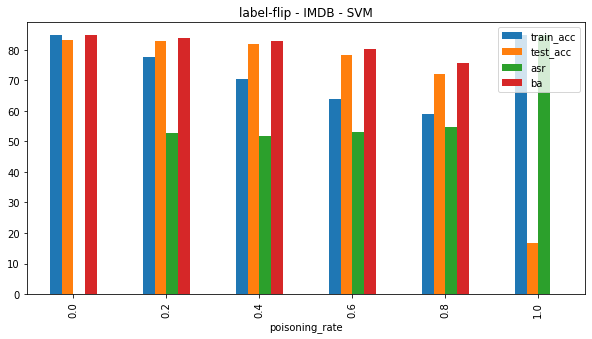

In [48]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 5]
attack = 'label-flip'
dataset = 'IMDB'
model = 'SVM'
tmp_df = extract_special(attack, dataset, model).sort_values('poisoning_rate')
tmp_df['asr'] = tmp_df['asr']*100
tmp_df['ba'] = tmp_df['ba']*100
title = ' - '.join((attack, dataset, model))
tmp_df.plot(kind='bar', x='poisoning_rate', y=['train_acc','test_acc','asr','ba'], title=title)
plt.savefig('/content/drive/MyDrive/experiments/Visualize/'+exp_id+'/'+title+'.jpg', dpi=300)

In [39]:
tmp_df.sort_values('poisoning_rate')

,attack,train_acc,test_acc,ba,asr,poisoning_rate,dataset,model
32,backdoor,84.836,83.320,84.836000,0.000000,0.0,IMDB,SVM
29,backdoor,87.300,82.764,84.270000,99.420000,0.2,IMDB,SVM
28,backdoor,90.880,82.748,84.973333,99.740000,0.4,IMDB,SVM
27,backdoor,93.828,81.940,84.790000,99.853333,0.6,IMDB,SVM
26,backdoor,97.380,80.392,87.040000,99.965000,0.8,IMDB,SVM
36,backdoor,100.000,69.320,0.000000,100.000000,1.0,IMDB,SVM
